In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()    

In [3]:
#splitting the data into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
#train and test data shape and image shpae 
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout



# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# some model parameters
#output size 
output_dim = 10
#input size
input_dim = X_train.shape[1]
#batch input size 
batch_size = 128 
#No of epochs 
nb_epoch = 20

In [13]:
print('Columsn :',X_train.shape[1],'Rows :',X_train.shape[0])


Columsn : 784 Rows : 60000


<h2> Applied various types of architecture with different drop rates with different optimizers and different normalization and drop out at different layers </h2>

<h2> 2 Layer architecture With Batch Normalization and Dropout </h2>

In [14]:

model_relu = Sequential()
#layer-1
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu.add(BatchNormalization())
#addding dropout rate 
model_relu.add(Dropout(0.5))
#layer-2 
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu.add(BatchNormalization())
#adding drop out rate
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))


#print(model_relu.summary())
#using optimizer adam 
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0829 13:26:52.092908 140021963048832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 13:26:52.129713 140021963048832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 13:26:52.140062 140021963048832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0829 13:26:52.245176 140021963048832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0829 13:26:52.271583 14

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.3707 - acc: 0.8881 - val_loss: 0.1326 - val_acc: 0.9559
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.1860 - acc: 0.9433 - val_loss: 0.0953 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.1483 - acc: 0.9549 - val_loss: 0.0845 - val_acc: 0.9733
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1225 - acc: 0.9614 - val_loss: 0.0813 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.1119 - acc: 0.9662 - val_loss: 0.0758 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1022 - acc: 0.9678 - val_loss: 0.0715 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0985 - acc: 0.9691 - val_loss: 0.0688 - val_a

Test score: 0.057854038857636625
Test accuracy: 0.9837


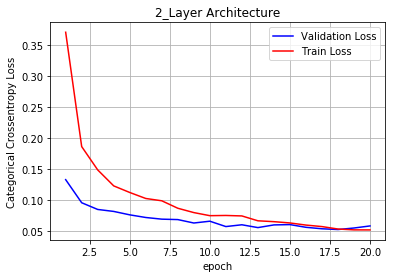

In [15]:
score_1 = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()

<h3> if we observe that above plot after 20 epochs our test loss may grater than our train loss </h3>

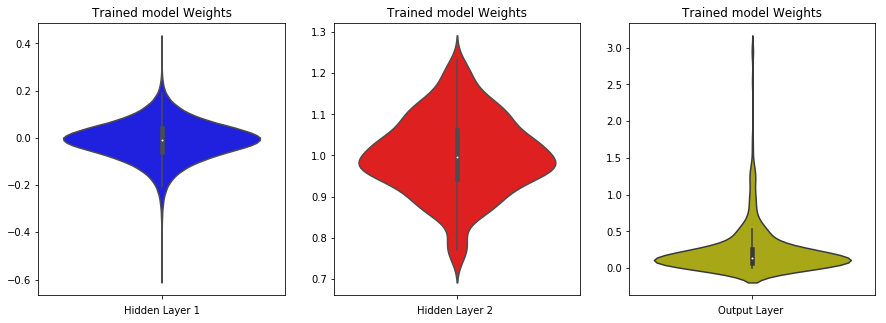

In [16]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 2 Layer architecture With-out Batch Normalization and Dropout </h2>

In [17]:
model_relu = Sequential()
#layer-1
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu.add(BatchNormalization())
#addding dropout rate 
#model_relu.add(Dropout(0.5))
#layer-2 
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu.add(BatchNormalization())
#adding drop out rate
#model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))


#print(model_relu.summary())
#using optimizer adam 
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2367 - acc: 0.9311 - val_loss: 0.1117 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0851 - acc: 0.9739 - val_loss: 0.0759 - val_acc: 0.9746
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0554 - acc: 0.9825 - val_loss: 0.0754 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0381 - acc: 0.9881 - val_loss: 0.0682 - val_acc: 0.9796
Epoch 5/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0280 - acc: 0.9909 - val_loss: 0.0721 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.0230 - acc: 0.9921 - val_loss: 0.0938 - val_acc: 0.9736
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0721 - val_acc

Test score: 0.10529097638992689
Test accuracy: 0.9792


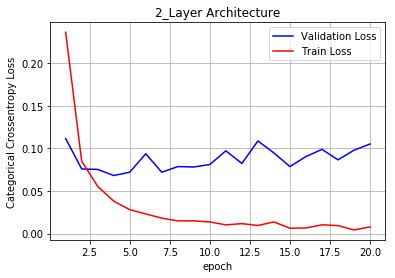

In [18]:
score_1 = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()

<h3> Here we see that in above plot  with out apply of batch-normalization and drop out we got test loss > train loss </h3>

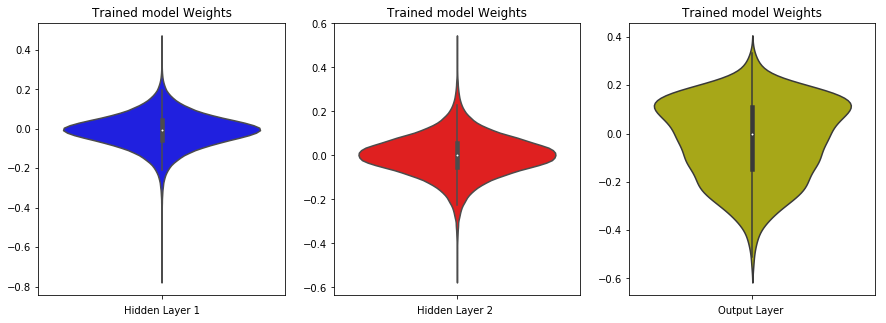

In [19]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> 2 layer architecture We also experiment with Different optimizer like Adadelta with different drop-out rate 0.2 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2279 - acc: 0.9306 - val_loss: 0.1119 - val_acc: 0.9662
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1027 - acc: 0.9680 - val_loss: 0.0833 - val_acc: 0.9751
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0721 - acc: 0.9778 - val_loss: 0.0684 - val_acc: 0.9789
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0562 - acc: 0.9823 - val_loss: 0.0725 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0641 - val_acc: 0.9812
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0347 - acc: 0.9889 - val_loss: 0.0680 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0308 - acc: 0.9898 - val_loss: 0.0631 - val_ac

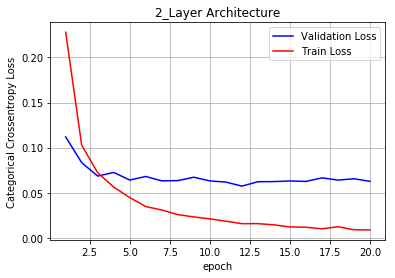

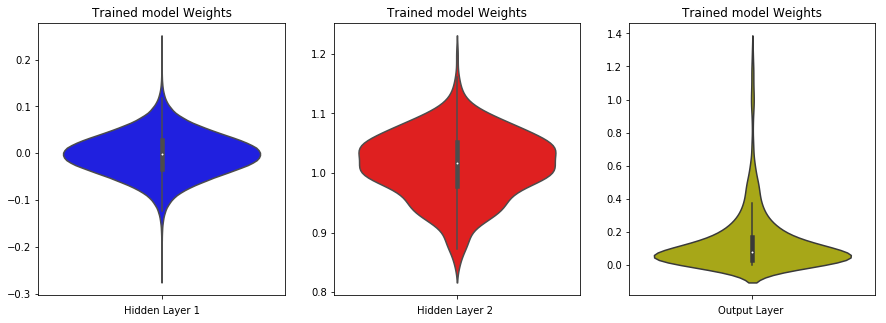

In [20]:

model_relu = Sequential()
#layer-1
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu.add(BatchNormalization())
#addding dropout rate 
model_relu.add(Dropout(0.2))
#layer-2 
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu.add(BatchNormalization())
#adding drop out rate
model_relu.add(Dropout(0.2))

model_relu.add(Dense(output_dim, activation='softmax'))


#print(model_relu.summary())
#using optimizer Adadelta 
model_relu.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#------------------------------------------------train and test error plots ------------------------------------------------------------------------------------
score_1 = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()
#-------------------------------------------------------------layer wise plots ------------------------------------------------------------------------
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 2 layer architecture We also experiment with by Adding only one batch normalization and one drop-out after first layer with adam with drop 5.0 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2600 - acc: 0.9211 - val_loss: 0.1131 - val_acc: 0.9642
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1335 - acc: 0.9582 - val_loss: 0.0849 - val_acc: 0.9737
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1072 - acc: 0.9666 - val_loss: 0.0754 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0891 - acc: 0.9716 - val_loss: 0.0724 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0811 - acc: 0.9739 - val_loss: 0.0690 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0735 - acc: 0.9766 - val_loss: 0.0674 - val_acc: 0.9805
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0656 - acc: 0.9784 - val_loss: 0.0610 - val_acc

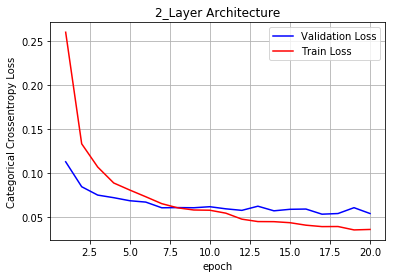

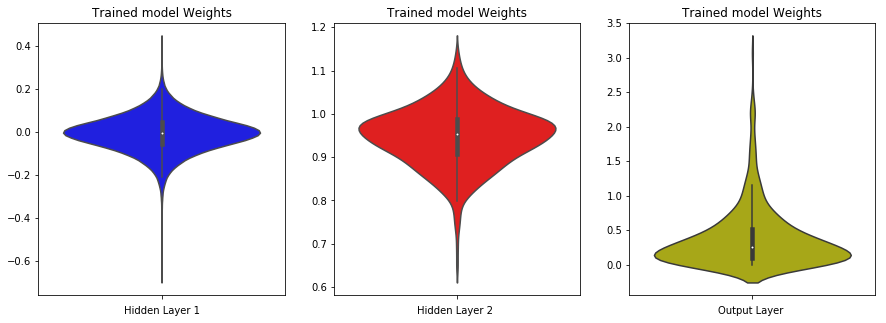

In [21]:

model_relu = Sequential()
#layer-1
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu.add(BatchNormalization())
#addding dropout rate 
model_relu.add(Dropout(0.5))
#layer-2 
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu.add(BatchNormalization())
#adding drop out rate
#model_relu.add(Dropout(0.2))

model_relu.add(Dense(output_dim, activation='softmax'))


#print(model_relu.summary())
#using optimizer Adadelta 
model_relu.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#------------------------------------------------train and test error plots ------------------------------------------------------------------------------------
score_1 = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()
#-------------------------------------------------------------layer wise plots ------------------------------------------------------------------------
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 2 layer architecture We also experiment with by Adding only one batch normalization and one-drop-out  before last layer with Adam with drop 0.5</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2597 - acc: 0.9221 - val_loss: 0.1330 - val_acc: 0.9586
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1153 - acc: 0.9657 - val_loss: 0.0851 - val_acc: 0.9737
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0797 - acc: 0.9758 - val_loss: 0.0875 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0609 - acc: 0.9811 - val_loss: 0.0803 - val_acc: 0.9730
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0465 - acc: 0.9859 - val_loss: 0.0667 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0396 - acc: 0.9871 - val_loss: 0.0868 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0342 - acc: 0.9888 - val_loss: 0.0980 - val_acc

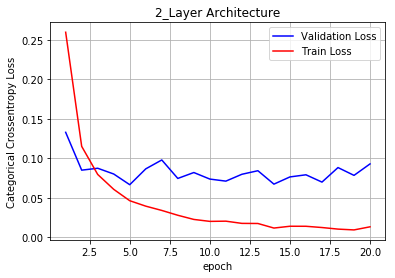

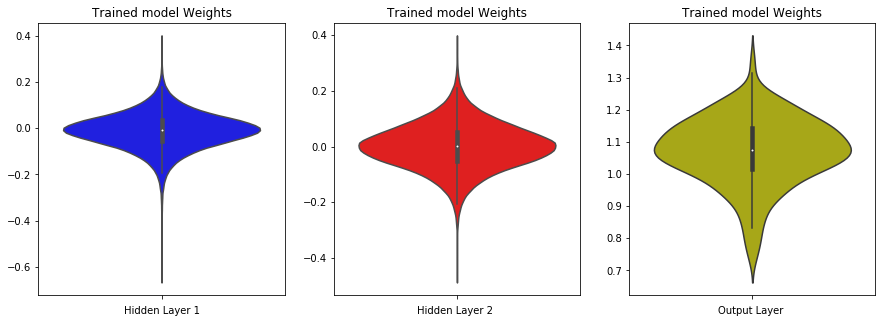

In [22]:

model_relu = Sequential()
#layer-1
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu.add(BatchNormalization())
#addding dropout rate 
#model_relu.add(Dropout(0.2))
#layer-2 
model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu.add(BatchNormalization())
#adding drop out rate
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))


#print(model_relu.summary())
#using optimizer Adadelta 
model_relu.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#------------------------------------------------train and test error plots ------------------------------------------------------------------------------------
score_1 = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()
#-------------------------------------------------------------layer wise plots ------------------------------------------------------------------------
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h2> 3-layer Architecture with Batch-Normalization and Dropout</h2>

In [23]:
model_relu2 = Sequential()
#layer-1
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu2.add(BatchNormalization())
#addding dropout rate 
model_relu2.add(Dropout(0.5))
#layer-2 
model_relu2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu2.add(BatchNormalization())
#adding drop out rate
model_relu2.add(Dropout(0.5))
#layer-3 
model_relu2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu2.add(BatchNormalization())
#adding drop out rate
model_relu2.add(Dropout(0.5))

model_relu2.add(Dense(output_dim, activation='softmax'))


#print(model_relu2.summary())
#using optimizer adam 
model_relu2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4738 - acc: 0.8567 - val_loss: 0.1498 - val_acc: 0.9544
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2196 - acc: 0.9350 - val_loss: 0.1086 - val_acc: 0.9653
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.1737 - acc: 0.9482 - val_loss: 0.0947 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.1487 - acc: 0.9558 - val_loss: 0.0790 - val_acc: 0.9749
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1309 - acc: 0.9608 - val_loss: 0.0792 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1215 - acc: 0.9637 - val_loss: 0.0767 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.1137 - acc: 0.9668 - val_loss: 0.0684 - 

Test score: 0.0504366103822249
Test accuracy: 0.9849


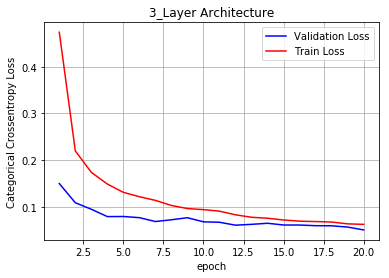

In [24]:
score_4 = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_4[0]) 
print('Test accuracy:', score_4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture')
plt.show()

<h3> In above plot at epoch 20 our train and test loss becomes same </h3>

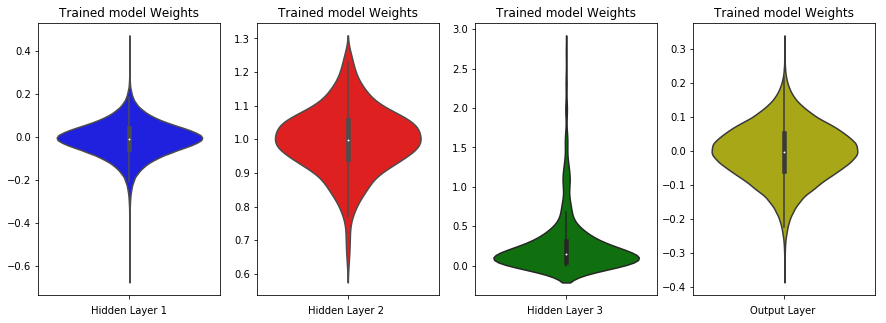

In [25]:
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)

out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 3-layer Architecture with-out Batch-Normalization and Dropout</h2>

In [26]:
model_relu2 = Sequential()
#layer-1
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu2.add(BatchNormalization())
#addding dropout rate 
#model_relu2.add(Dropout(0.5))
#layer-2 
model_relu2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu2.add(BatchNormalization())
#adding drop out rate
#model_relu2.add(Dropout(0.5))
#layer-3 
model_relu2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu2.add(BatchNormalization())
#adding drop out rate
#model_relu2.add(Dropout(0.5))

model_relu2.add(Dense(output_dim, activation='softmax'))


#print(model_relu2.summary())
#using optimizer adam 
model_relu2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#---------------------------------------------------------------------------------------------------------------------------------------------



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2393 - acc: 0.9295 - val_loss: 0.0985 - val_acc: 0.9686
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0852 - acc: 0.9740 - val_loss: 0.0770 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0549 - acc: 0.9824 - val_loss: 0.0884 - val_acc: 0.9741
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0423 - acc: 0.9867 - val_loss: 0.0993 - val_acc: 0.9702
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0307 - acc: 0.9899 - val_loss: 0.0748 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0259 - acc: 0.9916 - val_loss: 0.0709 - val_acc: 0.9806
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0220 - acc: 0.9931 - val_loss: 0.0775 - val_acc

Test score: 0.09140819830668388
Test accuracy: 0.9813


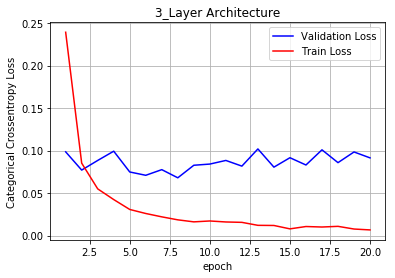

In [27]:
score_4 = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_4[0]) 
print('Test accuracy:', score_4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture')
plt.show()



<h3> Here we see that in above plot  with out apply of batch-normalization and drop out we got test loss > train loss </h3>

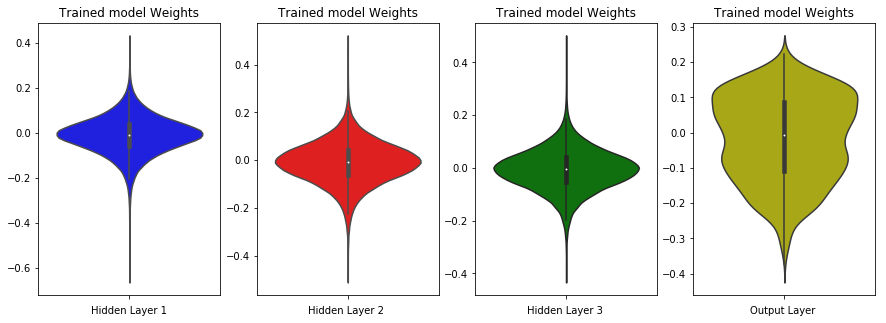

In [28]:
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)

out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> 3 layer architecture We also experiment with Different optimizer like Adadelta with different drop-out rate 0.2 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.2440 - acc: 0.9250 - val_loss: 0.1133 - val_acc: 0.9648
Epoch 2/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1140 - acc: 0.9655 - val_loss: 0.0878 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0830 - acc: 0.9738 - val_loss: 0.0698 - val_acc: 0.9782
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0640 - acc: 0.9796 - val_loss: 0.0732 - val_acc: 0.9783
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0522 - acc: 0.9837 - val_loss: 0.0609 - val_acc: 0.9811
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0445 - acc: 0.9853 - val_loss: 0.0596 - val_acc: 0.9819
Epoch 7/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0383 - acc: 0.9873 - val_loss: 0.0573 - 

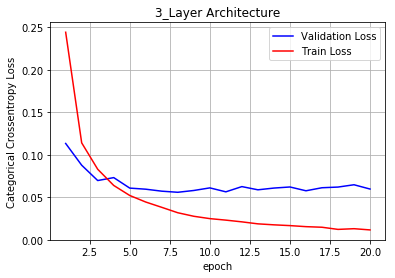

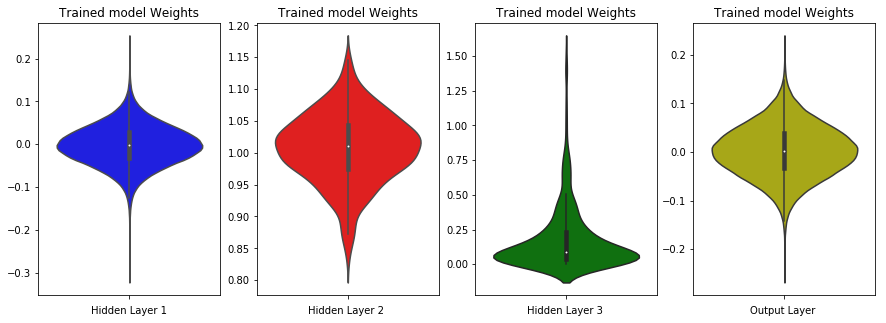

In [29]:
model_relu2 = Sequential()
#layer-1
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu2.add(BatchNormalization())
#addding dropout rate 
model_relu2.add(Dropout(0.2))
#layer-2 
model_relu2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu2.add(BatchNormalization())
#adding drop out rate
model_relu2.add(Dropout(0.2))
#layer-3 
model_relu2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu2.add(BatchNormalization())
#adding drop out rate
model_relu2.add(Dropout(0.2))

model_relu2.add(Dense(output_dim, activation='softmax'))


#print(model_relu2.summary())
#using optimizer adam 
model_relu2.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#-------------------------------------------------------------train and test error --------------------------------------------------------------------------------

score_4 = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_4[0]) 
print('Test accuracy:', score_4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture')
plt.show()

#-------------------------------------------------------------------layers performance ------------------------------------------------------------------
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)

out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 3 layer architecture Here below we experiment with one batch-normalization and 1 drop out layer at begining of the architecture with Adam optimizer and drop 0.5 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2582 - acc: 0.9199 - val_loss: 0.1245 - val_acc: 0.9590
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1377 - acc: 0.9567 - val_loss: 0.0946 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1065 - acc: 0.9656 - val_loss: 0.0814 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0930 - acc: 0.9705 - val_loss: 0.0773 - val_acc: 0.9764
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0834 - acc: 0.9729 - val_loss: 0.0712 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0733 - acc: 0.9764 - val_loss: 0.0709 - val_acc: 0.9786
Epoch 7/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0695 - acc: 0.9779 - val_loss: 0.0658 - val_ac

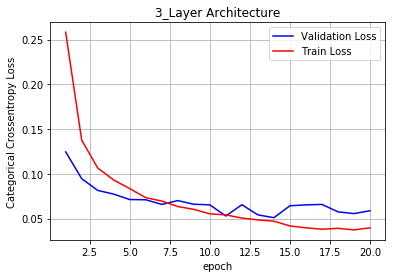

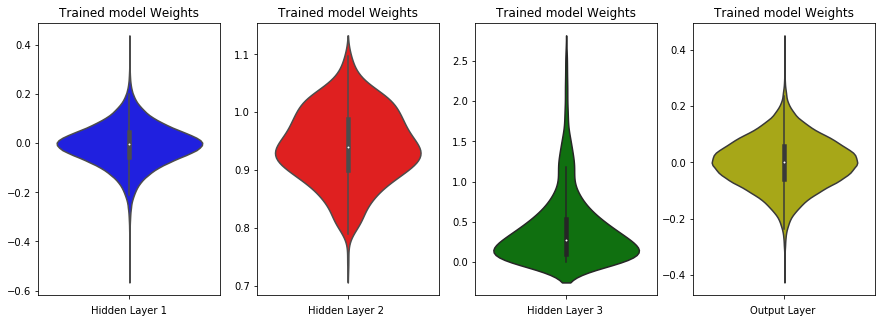

In [30]:
model_relu2 = Sequential()
#layer-1
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu2.add(BatchNormalization())
#addding dropout rate 
model_relu2.add(Dropout(0.5))
#layer-2 
model_relu2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu2.add(BatchNormalization())
#adding drop out rate
#model_relu2.add(Dropout(0.2))
#layer-3 
model_relu2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu2.add(BatchNormalization())
#adding drop out rate
#model_relu2.add(Dropout(0.2))

model_relu2.add(Dense(output_dim, activation='softmax'))


#print(model_relu2.summary())
#using optimizer adam 
model_relu2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#-------------------------------------------------------------train and test error --------------------------------------------------------------------------------

score_4 = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_4[0]) 
print('Test accuracy:', score_4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture')
plt.show()

#-------------------------------------------------------------------layers performance ------------------------------------------------------------------
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)

out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 3 layer architecture Here below we experiment with one batch-normalization and 1 drop out layer at before last layer in the architecturer with Adam optimizer and drop 0.5 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2086 - acc: 0.9362 - val_loss: 0.1729 - val_acc: 0.9471
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0899 - acc: 0.9725 - val_loss: 0.0934 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0596 - acc: 0.9809 - val_loss: 0.0691 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0372 - acc: 0.9879 - val_loss: 0.0680 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0724 - val_acc: 0.9781
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0173 - acc: 0.9945 - val_loss: 0.0574 - val_acc: 0.9839
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.0117 - acc: 0.9962 - val_loss: 0.0697 - val_ac

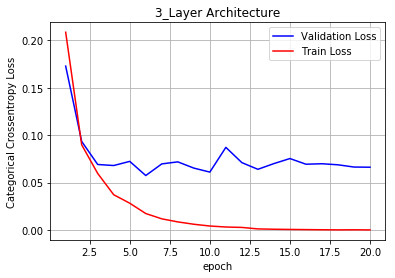

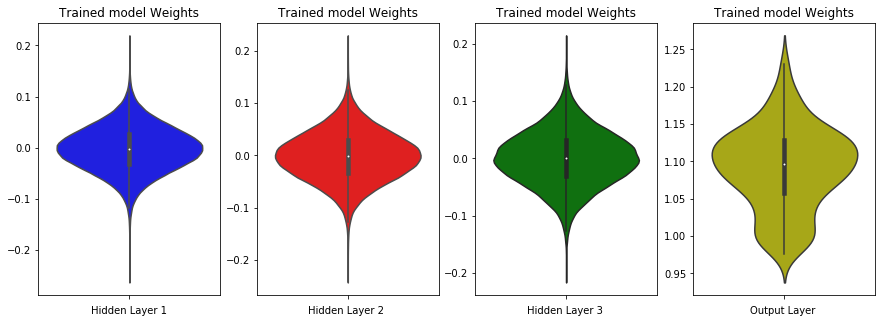

In [31]:
model_relu2 = Sequential()
#layer-1
model_relu2.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu2.add(BatchNormalization())
#addding dropout rate 
#model_relu2.add(Dropout(0.2))
#layer-2 
model_relu2.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu2.add(BatchNormalization())
#adding drop out rate
#model_relu2.add(Dropout(0.2))
#layer-3 
model_relu2.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu2.add(BatchNormalization())
#adding drop out rate
model_relu2.add(Dropout(0.2))

model_relu2.add(Dense(output_dim, activation='softmax'))


#print(model_relu2.summary())
#using optimizer adam 
model_relu2.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

#-------------------------------------------------------------train and test error --------------------------------------------------------------------------------

score_4 = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_4[0]) 
print('Test accuracy:', score_4[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture')
plt.show()

#-------------------------------------------------------------------layers performance ------------------------------------------------------------------
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)

out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 4, 1)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h2> 5-layer Architecture with Batch-Normalization and Dropout</h2>

In [32]:
model_relu3 = Sequential()
#layer-1
model_relu3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu3.add(BatchNormalization())
#addding dropout rate 
model_relu3.add(Dropout(0.5))
#layer-2 
model_relu3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.5))
#layer-3 
model_relu3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.5))
#layer-4 
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.5))
#layer-5 
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.5))

model_relu3.add(Dense(output_dim, activation='softmax'))


#print(model_relu3.summary())
#using optimizer adam 
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.7834 - acc: 0.7620 - val_loss: 0.1921 - val_acc: 0.9478
Epoch 2/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2929 - acc: 0.9170 - val_loss: 0.1483 - val_acc: 0.9584
Epoch 3/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.2324 - acc: 0.9356 - val_loss: 0.1326 - val_acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1981 - acc: 0.9460 - val_loss: 0.1052 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1768 - acc: 0.9519 - val_loss: 0.1044 - val_acc: 0.9709
Epoch 6/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1624 - acc: 0.9551 - val_loss: 0.0932 - val_acc: 0.9753
Epoch 7/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.1541 - acc: 0.9577 - val_loss: 0.0

Test score: 0.066039138047304
Test accuracy: 0.9824


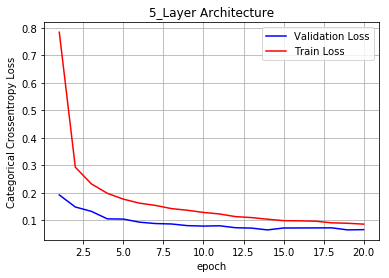

In [33]:
score_6 = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_6[0]) 
print('Test accuracy:', score_6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture')
plt.show()

<h3> In above plot it maintains smaller error distance from  train to test </h3>


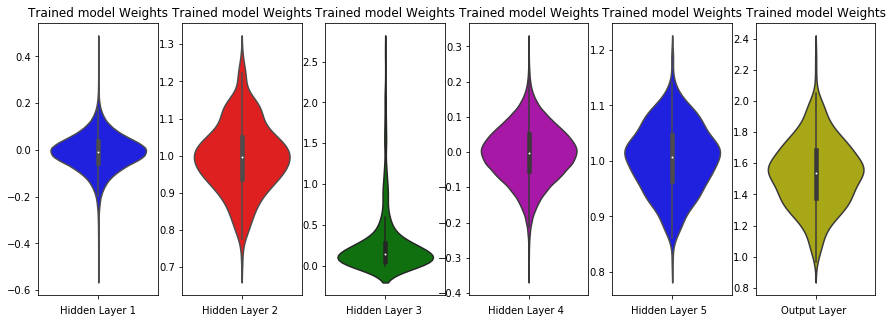

In [34]:
w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1,)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4  ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5  ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> 5-layer Architecture with-out Batch-Normalization and Dropout</h2>

In [35]:

model_relu3 = Sequential()
#layer-1
model_relu3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu3.add(BatchNormalization())
#addding dropout rate 
#model_relu3.add(Dropout(0.5))
#layer-2 
model_relu3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.5))
#layer-3 
model_relu3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.5))
#layer-4 
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.5))
#layer-5 
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.5))

model_relu3.add(Dense(output_dim, activation='softmax'))


#print(model_relu3.summary())
#using optimizer adam 
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2755 - acc: 0.9157 - val_loss: 0.1198 - val_acc: 0.9652
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0965 - acc: 0.9713 - val_loss: 0.0879 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0673 - acc: 0.9796 - val_loss: 0.0929 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0518 - acc: 0.9842 - val_loss: 0.0936 - val_acc: 0.9757
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0424 - acc: 0.9868 - val_loss: 0.0852 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0334 - acc: 0.9897 - val_loss: 0.0896 - val_acc: 0.9745
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0329 - acc: 0.9901 - val_loss: 0.0849 - val_ac

Test score: 0.08883313840526234
Test accuracy: 0.983


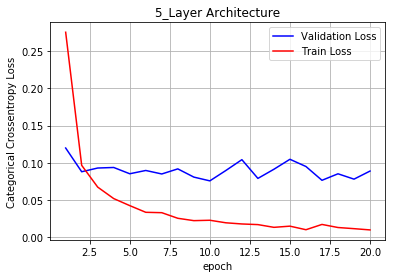

In [36]:
score_6 = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_6[0]) 
print('Test accuracy:', score_6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture')
plt.show()

<h3> Here we see that in above plot  with out apply of batch-normalization and drop out we got test loss > train loss </h3>

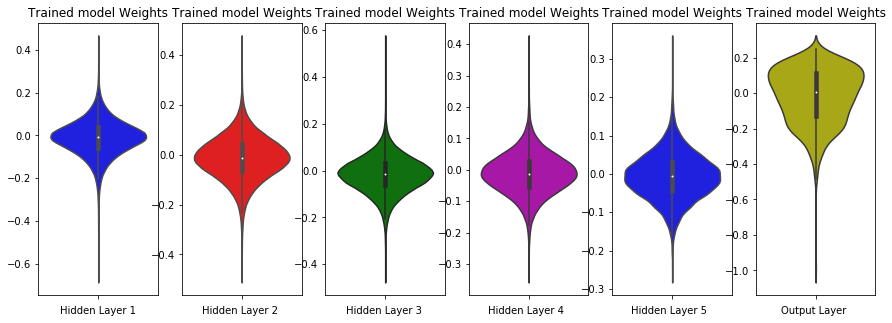

In [37]:
w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1,)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4  ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5  ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> 5 layer architecture We also experiment with Different optimizer like Adadelta with different drop-out rate 0.2 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.3082 - acc: 0.9069 - val_loss: 0.1241 - val_acc: 0.9633
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.1455 - acc: 0.9573 - val_loss: 0.1102 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.1043 - acc: 0.9689 - val_loss: 0.0906 - val_acc: 0.9729
Epoch 4/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0869 - acc: 0.9738 - val_loss: 0.0711 - val_acc: 0.9789
Epoch 5/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0715 - acc: 0.9776 - val_loss: 0.0752 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0572 - acc: 0.9829 - val_loss: 0.0795 - val_acc: 0.9771
Epoch 7/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0518 - acc: 0.9847 - val_loss: 0.

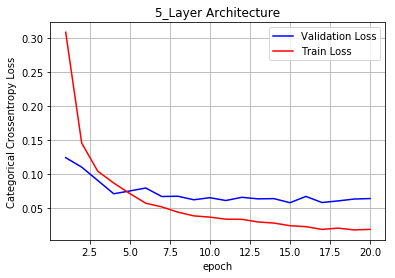

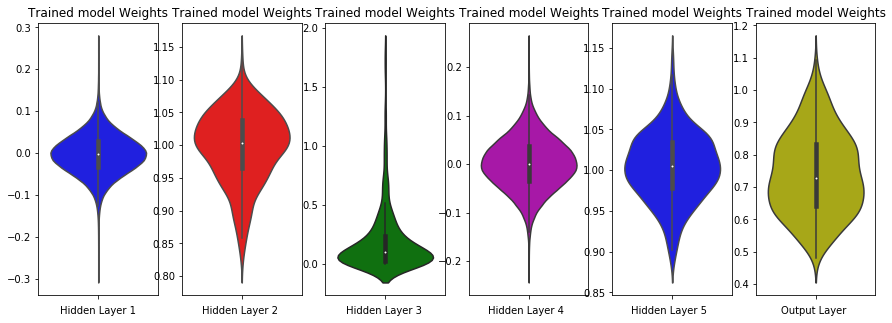

In [38]:
model_relu3 = Sequential()
#layer-1
model_relu3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu3.add(BatchNormalization())
#addding dropout rate 
model_relu3.add(Dropout(0.2))
#layer-2 
model_relu3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.2))
#layer-3 
model_relu3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.2))
#layer-4 
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.2))
#layer-5 
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.2))

model_relu3.add(Dense(output_dim, activation='softmax'))


#print(model_relu3.summary())
#using optimizer adam 
model_relu3.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
#-----------------------------------------------------------------------------------------------------------------------------------------
score_6 = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_6[0]) 
print('Test accuracy:', score_6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture')
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------
w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1,)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4  ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5  ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 5 layer architecture Here below we experiment with one batch-normalization and 1 drop out layer in the begining of the architecture it means after first layer with Adam optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.2350 - acc: 0.9285 - val_loss: 0.1170 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1027 - acc: 0.9687 - val_loss: 0.0900 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0822 - acc: 0.9754 - val_loss: 0.0808 - val_acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0644 - acc: 0.9800 - val_loss: 0.0775 - val_acc: 0.9770
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0578 - acc: 0.9825 - val_loss: 0.0830 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0523 - acc: 0.9841 - val_loss: 0.0746 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0795 - val_a

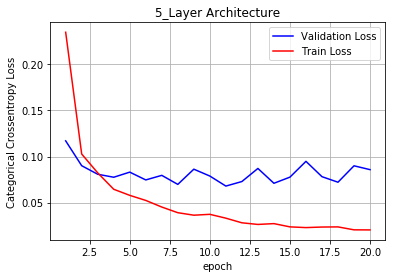

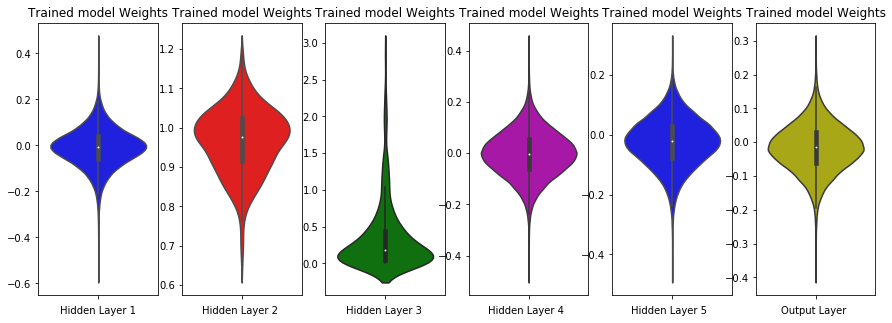

In [39]:
model_relu3 = Sequential()
#layer-1
model_relu3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
model_relu3.add(BatchNormalization())
#addding dropout rate 
model_relu3.add(Dropout(0.2))
#layer-2 
model_relu3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-3 
model_relu3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-4 
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-5 
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))

model_relu3.add(Dense(output_dim, activation='softmax'))


#print(model_relu3.summary())
#using optimizer adam 
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
#-----------------------------------------------------------------------------------------------------------------------------------------
score_6 = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_6[0]) 
print('Test accuracy:', score_6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture')
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------
w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1,)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4  ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5  ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

<h3> 5 layer architecture Here below we experiment with one batch-normalization and 1 drop out layer in the before last layer  of the architecture with Adam optimizer and drop 0.5 </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2481 - acc: 0.9283 - val_loss: 0.1171 - val_acc: 0.9651
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1040 - acc: 0.9715 - val_loss: 0.1006 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0701 - acc: 0.9800 - val_loss: 0.1140 - val_acc: 0.9672
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0554 - acc: 0.9841 - val_loss: 0.0765 - val_acc: 0.9790
Epoch 5/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0418 - acc: 0.9883 - val_loss: 0.0803 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0359 - acc: 0.9893 - val_loss: 0.0827 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0775 - val_ac

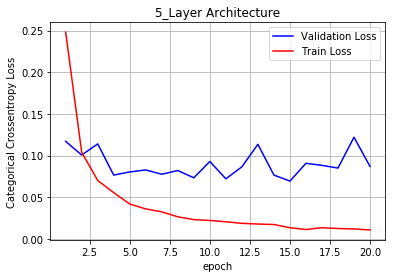

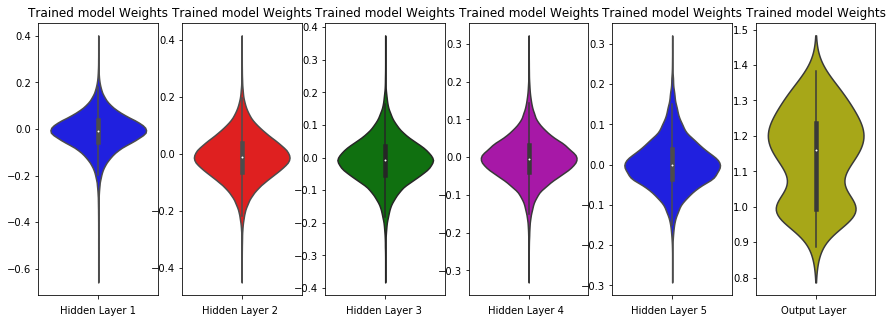

In [40]:
model_relu3 = Sequential()
#layer-1
model_relu3.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch normalization 
#model_relu3.add(BatchNormalization())
#addding dropout rate 
#model_relu3.add(Dropout(0.2))
#layer-2 
model_relu3.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-3 
model_relu3.add(Dense(300, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-4 
model_relu3.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
#model_relu3.add(BatchNormalization())
#adding drop out rate
#model_relu3.add(Dropout(0.2))
#layer-5 
model_relu3.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
#adding batch noramalization 
model_relu3.add(BatchNormalization())
#adding drop out rate
model_relu3.add(Dropout(0.5))

model_relu3.add(Dense(output_dim, activation='softmax'))


#print(model_relu3.summary())
#using optimizer adam 
model_relu3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
#-----------------------------------------------------------------------------------------------------------------------------------------
score_6 = model_relu3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_6[0]) 
print('Test accuracy:', score_6[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture')
plt.show()

#------------------------------------------------------------------------------------------------------------------------------------------

w_after = model_relu3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)

out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure(figsize=(15,5))
plt.title("Weight matrices after model trained")

plt.subplot(1, 6, 1,)

plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='m')
plt.xlabel('Hidden Layer 4  ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='b')
plt.xlabel('Hidden Layer 5  ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Above We got  our test-loss > train-loss which is not a good performance  </h3>

In [44]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Layer ","Test_Score", "Test_Accuracy", "Epoch", "Drop_Outrate","Optimizer","ACtivation","Drop_out + Normalization Layers","Test_performance"]

x.add_row(["2", 0.057, 0.98,20, 0.5,"ADAM",     "ReLu","Every","good"])
x.add_row(["2", 0.10,  0.98,20, 0.5,"ADAM",     "ReLu","None","Not-good"])
x.add_row(["2", 0.062, 0.98,20, 0.2,"Ada_delta","ReLu","Every","Not-good"])
x.add_row(["2", 0.054, 0.98,20, 0.5,"ADAM",     "ReLu","First","Not-good"])
x.add_row(["2", 0.093, 0.98,20, 0.5,"ADAM",     "ReLu","Last","Not-good"])

print(x)

x2 = PrettyTable()

x2.field_names = ["Layer ","Test_Score", "Test_Accuracy", "Epoch", "Drop_Outrate","Optimizer","ACtivation","Drop_out + Normalization Layers","Test_performance"]

x2.add_row(["3", 0.050, 0.98,20, 0.5,"ADAM",     "ReLu","Every","good"])
x2.add_row(["3", 0.091,  0.98,20, 0.5,"ADAM",     "ReLu","None","Not-good"])
x2.add_row(["3", 0.059, 0.98,20, 0.2,"Ada_delta","ReLu","Every","Not-good"])
x2.add_row(["3", 0.058, 0.98,20, 0.5,"ADAM",     "ReLu","First","Not-good"])
x2.add_row(["3", 0.066, 0.98,20, 0.5,"ADAM",     "ReLu","Last","Not-good"])

print(x2)

x3 = PrettyTable()

x3.field_names = ["Layer ","Test_Score", "Test_Accuracy", "Epoch", "Drop_Outrate","Optimizer","ACtivation","Drop_out + Normalization Layers","Test_performance"]

x3.add_row(["5", 0.066, 0.98,20, 0.5,"ADAM",     "ReLu","Every","good"])
x3.add_row(["5", 0.088,  0.98,20, 0.5,"ADAM",     "ReLu","None","Not-good"])
x3.add_row(["5", 0.064, 0.98,20, 0.2,"Ada_delta","ReLu","Every","Not-good"])
x3.add_row(["5", 0.085, 0.98,20, 0.5,"ADAM",     "ReLu","First","Not-good"])
x3.add_row(["5", 0.086, 0.98,20, 0.5,"ADAM",     "ReLu","Last","Not-good"])

print(x3)


+--------+------------+---------------+-------+--------------+-----------+------------+---------------------------------+------------------+
| Layer  | Test_Score | Test_Accuracy | Epoch | Drop_Outrate | Optimizer | ACtivation | Drop_out + Normalization Layers | Test_performance |
+--------+------------+---------------+-------+--------------+-----------+------------+---------------------------------+------------------+
|   2    |   0.057    |      0.98     |   20  |     0.5      |    ADAM   |    ReLu    |              Every              |       good       |
|   2    |    0.1     |      0.98     |   20  |     0.5      |    ADAM   |    ReLu    |               None              |     Not-good     |
|   2    |   0.062    |      0.98     |   20  |     0.2      | Ada_delta |    ReLu    |              Every              |     Not-good     |
|   2    |   0.054    |      0.98     |   20  |     0.5      |    ADAM   |    ReLu    |              First              |     Not-good     |
|   2    |   

<h1>Observations</h1>
<ol>
  <li>Applied Various Level Architectures(2,3,5) for observing the model performance using MNIST data</li>
  <li>Applied models with and with out Batch Normalization and Drop_out rate </li>
    <li>Models with batch normalization and dropuout rate gives better results compare to without apply</li>
    <li>For all models we get same kind of accuracy but difference occur at test_loss i.e, with-out batch models we got test-loss > train loss leads to bad model performance </li>
    <li>We use Constant  drop out rate, we may get good results with opitmal drop-out rate and optimal layers by doing some hyper parameter tuning for drop-out and no of layers and no of neurons per layers </li>
    <li>We get similar performance for 2,3,5 architectures with batch normalization and drop-out rate 3  layer architecture gives smoother curve at test loss  compare to 2,5 architectures </li>
  <li>If we observe above tables model with batch-normalization and drop-out 0.5 at every layers  model gives good performance   </li>
  <li>If we took low drop-rate and high drop rate with out batch normalization model performance is not good observe the above error plots for every model observe the difference </li>
  <li>Models with batch-normalization and drop-out rate 0.5 at every layers gives similar  performance which is good 3 layer architecture gives good performance because it converges with train loss means training and validation performs well 





  </ol>